In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/My Drive/broutanlab_course/

Mounted at /content/drive
/content/drive/My Drive/broutanlab_course


In [2]:
import os
import glob
import numpy as np
import cv2
import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from keras import backend as K
from google.colab.patches import cv2_imshow

In [3]:
K.set_image_data_format('channels_first')
FRmodel = faceRecoModel(input_shape=(3, 96, 96))

In [4]:
def triplet_loss(y_true, y_pred, alpha = 0.3):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,
               positive)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, 
               negative)), axis=-1)
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
   
    return loss

In [5]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [6]:
def prepare_database():
  database = {}
  for file in glob.glob("images/*"):
    identity = os.path.splitext(os.path.basename(file))[0]
    database[identity] = img_path_to_encoding(file, FRmodel)
  return database

In [7]:
def who_is_it(image, database, model):
    encoding = img_to_encoding(image, model)
    
    min_dist = 100
    identity = None
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc - encoding)
        print('distance for %s is %s' %(name, dist))
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > 0.7:
        return None
    else:
        return identity

In [8]:

database = prepare_database()

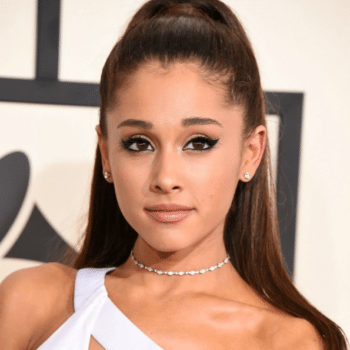

In [9]:
img1 = cv2.imread('pic1.png')
cv2_imshow(img1)

In [10]:
who_is_it(img1,database,FRmodel)

distance for Selena Gomez is 1.1036346
distance for Ariana Grange is 0.5426188


'Ariana Grange'